# Project: Investigate the TMDB 5000 Movie Dataset from Kaggle
## Overview
In this project, we'll be analyzing data containing information on about 10,000 movies collected from The Movie Database (TMDb). In particular, we'll be interested in finding trends among movie genre and popularity over time, as well as the kinds of properties that are associated with movies with high revenues.
<br>
This data set contains information
about 10,000 movies collected from
The Movie Database (TMDb),
including user ratings and revenue.

In [23]:
# Loading the data and the appropriate libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [5]:
movie_df = pd.read_csv('tmdb-movies.csv')
movie_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

The dataset contains the following features:-<br>

movie_id - A unique identifier for each movie.<br>
cast - The name of lead and supporting actors.<br>
crew - The name of Director, Editor, Composer, Writer etc.<br>
budget - The budget in which the movie was made.<br>
genre - The genre of the movie, Action, Comedy ,Thriller etc.<br>
homepage - A link to the homepage of the movie.<br>
id - This is infact the movie_id as in the first dataset.<br>
keywords - The keywords or tags related to the movie.<br>
original_language - The language in which the movie was made.<br>
original_title - The title of the movie before translation or adaptation.<br>
overview - A brief description of the movie.<br>
popularity - A numeric quantity specifying the movie popularity.<br>
production_companies - The production house of the movie.<br>
production_countries - The country in which it was produced.<br>
release_date - The date on which it was released.<br>
revenue - The worldwide revenue generated by the movie.<br>
runtime - The running time of the movie in minutes.<br>
status - "Released" or "Rumored".<br>
tagline - Movie's tagline.<br>
title - Title of the movie.<br>
vote_average - average ratings the movie recieved.<br>
vote_count - the count of votes recieved.<br>

Let's look at a histogram matrix of the entire dataset:

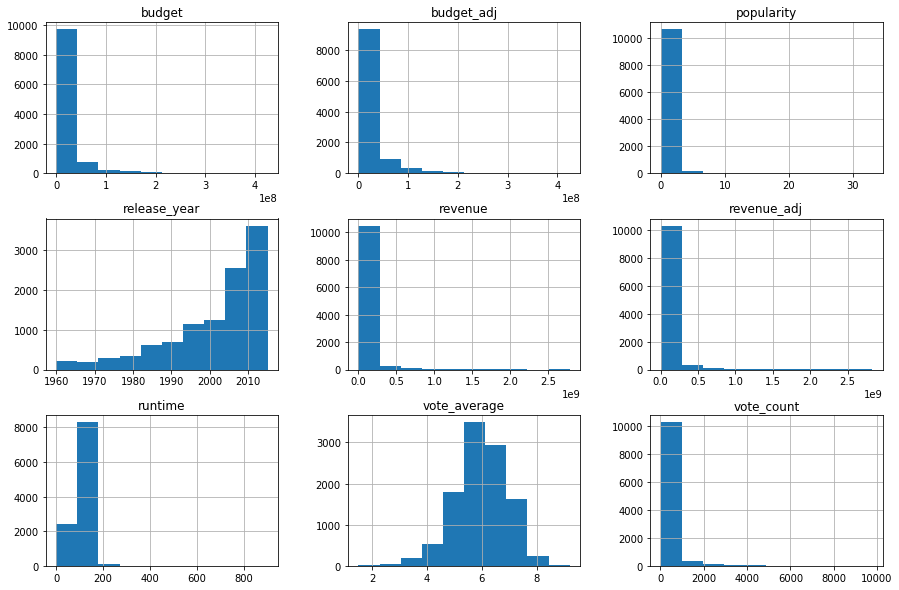

In [40]:
movie_df.hist(figsize=(15, 10));

Notable observations include:
- As the release_year becomes more recent, the number of movies available for that year seems to increase steadily
- For some reason, a large amount of data from the movie budget and revenue columns are zero. 
- The distribution of the average vote for all the movies seems to be centered around 6.

## First analysis plan: Which genres are most popular from year to year?
For the first analysis, I plan to track the popularity of each genre over time. The goal is to end up with a multiple line graph, with each line representing a genre of the given movie dataset. 

To start off with, let's drop the columns that won't be useful to our investigation:

In [29]:
movie_df.drop(columns=['id', 'imdb_id', 'original_title', 'homepage', 'overview', 'cast', 'homepage', 'director', 'tagline', 'overview'], axis=1, inplace=True)

It can be observed that most, if not all movie entries contain multiple genres each, separated by a '|' delimiter.<br><br> 
Let's look at the frequency of the data in the 'release_year' column:

In [30]:
pd.DataFrame(movie_df['release_year'].value_counts()).sort_index()

,release_year
1960,32
1961,31
1962,32
1963,34
1964,42
1965,35
1966,46
1967,40
1968,39
1969,31


There seems to be movies in this dataset that were released every year from 1960 to 2015, and the frequencies increase as the years become recent as expected.  This means we can include every year from 1960 to 2015 as part of our assessment without worrying about any blank years. 

Now let's separate out the genres:

In [154]:
total_genres = set()

def getUniqueGenres(genre_data):
    split_genres = str(genre_data).split("|")
    for genre in split_genres:
        total_genres.add(genre)

movie_df["genres"].apply(getUniqueGenres)
# Now total_genres is filled with unique genres
total_genres = list(total_genres)
total_genres.remove('nan')
total_genres.sort()
total_genres

['Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western']

Let's query the movies that were released from 1960:

In [155]:
df_1960 = movie_df.query('release_year == 1960')
df_1960 = df_1960.reset_index()
df_1960

,index,popularity,budget,revenue,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,10141,2.610362,806948,32000000,hotel|clerk|arizona|shower|rain,109,Drama|Horror|Thriller,Shamley Productions,8/14/60,1180,8.0,1960,5.949601e+06,2.359350e+08
1,10142,1.872132,2000000,4905000,horse|village|friendship|remake|number in title,128,Action|Adventure|Western,The Mirisch Corporation|Alpha Productions,10/23/60,224,7.0,1960,1.474593e+07,3.616441e+07
2,10143,1.136943,12000000,60000000,gladiator|roman empire|gladiator fight|slavery...,197,Action|Drama|History,Bryna Productions,10/6/60,211,6.9,1960,8.847561e+07,4.423780e+08
3,10144,0.947307,3000000,25000000,new york|new year's eve|lovesickness|age diffe...,125,Comedy|Drama|Romance,United Artists|The Mirisch Company,6/15/60,235,7.9,1960,2.211890e+07,1.843242e+08
4,10145,0.875173,0,0,musical,114,Comedy|Romance,Twentieth Century Fox Film Corporation|The Com...,10/7/60,15,4.9,1960,0.000000e+00,0.000000e+00
5,10146,0.712389,750000,0,london|inventor|future|time travel|dystopia,103,Thriller|Adventure|Fantasy|Science Fiction|Rom...,George Pal Productions|Galaxy Films Inc.,8/17/60,101,7.3,1960,5.529726e+06,0.000000e+00
6,10147,0.569424,0,0,cinematographer|photography|illegal prostitution,101,Horror|Thriller,National Film Finance Corporation (NFFC)|Anglo...,4/6/60,56,7.4,1960,0.000000e+00,0.000000e+00
7,10148,0.465879,0,0,tree house|island|shipwreck|pirate gang|swiss ...,126,Adventure|Family,Buena Vista Pictures,12/21/60,47,6.9,1960,0.000000e+00,0.000000e+00
8,10149,0.423531,0,0,gambling|perfect crime|casino|new year's eve|r...,127,Thriller|Music|Comedy|Crime,Warner Bros.|Dorchester,8/10/60,39,6.6,1960,0.000000e+00,0.000000e+00
9,10150,0.421043,0,0,indian|texas|farm|siblings|saddle,125,Action|Drama|Western,James Productions,1/1/60,17,4.9,1960,0.000000e+00,0.000000e+00


In [156]:
df_1970 = movie_df.query('release_year == 1970')
df_1970 = df_1970.reset_index()
df_1980 = movie_df.query('release_year == 1980')
df_1980 = df_1980.reset_index()
df_1990 = movie_df.query('release_year == 1990')
df_1990 = df_1990.reset_index()
df_2000 = movie_df.query('release_year == 2000')
df_2000 = df_2000.reset_index()
df_2015 = movie_df.query('release_year == 2015')
df_2015 = df_2015.reset_index()

Let's see if we can work with a string representation of a series:

In [157]:
genres_str_1960 = df_1960['genres'].to_string()
genres_str_1960

'0                                 Drama|Horror|Thriller\n1                              Action|Adventure|Western\n2                                  Action|Drama|History\n3                                  Comedy|Drama|Romance\n4                                        Comedy|Romance\n5     Thriller|Adventure|Fantasy|Science Fiction|Rom...\n6                                       Horror|Thriller\n7                                      Adventure|Family\n8                           Thriller|Music|Comedy|Crime\n9                                  Action|Drama|Western\n10                                 Comedy|Drama|Romance\n11                                               Horror\n12                                      Horror|Thriller\n13                                                Drama\n14                                        Crime|Western\n15                                       Action|Western\n16                         Action|Drama|Romance|Western\n17                            

In [158]:
genres_str_1970 = df_1970['genres'].to_string()
genres_str_1980 = df_1980['genres'].to_string()
genres_str_1990 = df_1990['genres'].to_string()
genres_str_2000 = df_2000['genres'].to_string()
genres_str_2015 = df_2015['genres'].to_string()

In [159]:
genres_str_1960.count('Action')

8

In [160]:
year_1960 = pd.DataFrame(index=total_genres, columns=['1960'])
year_1960

,1960
Action,NaN
Adventure,NaN
Animation,NaN
Comedy,NaN
Crime,NaN
Documentary,NaN
Drama,NaN
Family,NaN
Fantasy,NaN
Foreign,NaN


In [161]:
year_1970 = pd.DataFrame(index=total_genres, columns=['1970'])
year_1970

,1970
Action,NaN
Adventure,NaN
Animation,NaN
Comedy,NaN
Crime,NaN
Documentary,NaN
Drama,NaN
Family,NaN
Fantasy,NaN
Foreign,NaN


In [163]:
year_1980 = pd.DataFrame(index=total_genres, columns=['1980'])
year_1990 = pd.DataFrame(index=total_genres, columns=['1990'])
year_2000 = pd.DataFrame(index=total_genres, columns=['2000'])
year_2015 = pd.DataFrame(index=total_genres, columns=['2015'])

In [164]:
for genre in total_genres:
    genres_str_1960 = df_1960['genres'].to_string()
    count = genres_str_1960.count(genre)
    year_1960['1960'][genre] = (count / df_1960.shape[0])
    

In [165]:
for genre in total_genres:
    genres_str_1970 = df_1970['genres'].to_string()
    count = genres_str_1970.count(genre)
    year_1970['1970'][genre] = (count / df_1970.shape[0])

In [166]:
for genre in total_genres:
    genres_str_1980 = df_1980['genres'].to_string()
    count = genres_str_1980.count(genre)
    year_1980['1980'][genre] = (count / df_1980.shape[0])
    
for genre in total_genres:
    genres_str_1990 = df_1990['genres'].to_string()
    count = genres_str_1990.count(genre)
    year_1990['1990'][genre] = (count / df_1990.shape[0])
    
for genre in total_genres:
    genres_str_2000 = df_2000['genres'].to_string()
    count = genres_str_2000.count(genre)
    year_2000['2000'][genre] = (count / df_2000.shape[0])
    
for genre in total_genres:
    genres_str_2015 = df_2015['genres'].to_string()
    count = genres_str_2015.count(genre)
    year_2015['2015'][genre] = (count / df_2015.shape[0])

In [168]:
year_1960

,1960
Action,0.25
Adventure,0.15625
Animation,0
Comedy,0.25
Crime,0.0625
Documentary,0
Drama,0.40625
Family,0.09375
Fantasy,0.0625
Foreign,0.03125


In [169]:
year_1970

,1970
Action,0.268293
Adventure,0.146341
Animation,0.0487805
Comedy,0.292683
Crime,0.097561
Documentary,0.0731707
Drama,0.463415
Family,0.0731707
Fantasy,0.0731707
Foreign,0.0243902


In [170]:
# maybe make a copy of 1960 dataframe for the future
year_1960['1970'] = year_1970['1970']
year_1960['1980'] = year_1980['1980']
year_1960['1990'] = year_1990['1990']
year_1960['2000'] = year_2000['2000']
year_1960['2015'] = year_2015['2015']
year_1960

,1960,1970,1980,1990,2000,2015
Action,0.25,0.268293,0.346154,0.295455,0.207048,0.170111
Adventure,0.15625,0.146341,0.179487,0.174242,0.123348,0.109698
Animation,0,0.0487805,0,0.030303,0.118943,0.0620032
Comedy,0.25,0.292683,0.320513,0.363636,0.427313,0.257552
Crime,0.0625,0.097561,0.115385,0.227273,0.136564,0.0810811
Documentary,0,0.0731707,0,0.00757576,0.0132159,0.09062
Drama,0.40625,0.463415,0.410256,0.454545,0.444934,0.413355
Family,0.09375,0.0731707,0.0512821,0.0909091,0.145374,0.0699523
Fantasy,0.0625,0.0731707,0.0897436,0.0984848,0.092511,0.0524642
Foreign,0.03125,0.0243902,0.025641,0.00757576,0.0176211,0


In [171]:
year_1960 = year_1960.transpose()
year_1960

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
1960,0.25,0.15625,0,0.25,0.0625,0,0.40625,0.09375,0.0625,0.03125,0.15625,0.21875,0.03125,0,0.15625,0.09375,0,0.1875,0.0625,0.1875
1970,0.268293,0.146341,0.0487805,0.292683,0.097561,0.0731707,0.463415,0.0731707,0.0731707,0.0243902,0.0731707,0.121951,0.097561,0.0731707,0.146341,0.0731707,0.0243902,0.121951,0.121951,0.195122
1980,0.346154,0.179487,0,0.320513,0.115385,0,0.410256,0.0512821,0.0897436,0.025641,0.0641026,0.205128,0.0512821,0.115385,0.115385,0.141026,0.0128205,0.320513,0.025641,0.0641026
1990,0.295455,0.174242,0.030303,0.363636,0.227273,0.00757576,0.454545,0.0909091,0.0984848,0.00757576,0.030303,0.19697,0.0151515,0.106061,0.143939,0.136364,0.00757576,0.348485,0.0151515,0.0227273
2000,0.207048,0.123348,0.118943,0.427313,0.136564,0.0132159,0.444934,0.145374,0.092511,0.0176211,0.0176211,0.092511,0.0440529,0.061674,0.207048,0.101322,0.00440529,0.277533,0.0220264,0.00881057
2015,0.170111,0.109698,0.0620032,0.257552,0.0810811,0.09062,0.413355,0.0699523,0.0524642,0,0.0238474,0.198728,0.0524642,0.0667727,0.09062,0.136725,0.0317965,0.27186,0.0143084,0.00953895


In [116]:
year_1960['1960'].sum()


2.285714285714285

The sum of the proportions of the genres do not add to 1 because each movie often contains multiple genres rather than a single unique one. In addition, this proportion may vary as the number of movies changes. 

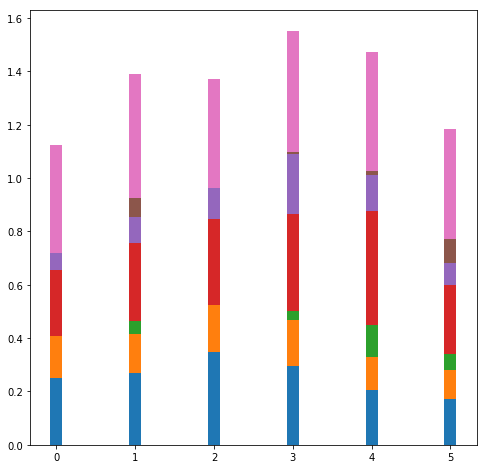

In [184]:
indx = np.arange(len(year_1960))
plt.figure(figsize=(8, 8))

graphAction = plt.bar(x=indx, height=year_1960['Action'], width=0.15)
graphAdventure = plt.bar(x=indx, height=year_1960['Adventure'], width=0.15, bottom=year_1960['Action'])
graphAnimation = plt.bar(x=indx, height=year_1960['Animation'], width=0.15, bottom=year_1960['Action'] + year_1960['Adventure'])
graphComedy = plt.bar(x=indx, height=year_1960['Comedy'], width=0.15, bottom=year_1960['Action'] + year_1960['Adventure'] + year_1960['Animation'])
graphCrime = plt.bar(x=indx, height=year_1960['Crime'], width=0.15, bottom=year_1960['Action'] + year_1960['Adventure'] + year_1960['Animation'] + year_1960['Comedy'])
graphDocumentary = plt.bar(x=indx, height=year_1960['Documentary'], width=0.15, bottom=year_1960['Action'] + year_1960['Adventure'] + year_1960['Animation'] + year_1960['Comedy'] + year_1960['Crime'])
graphDrama = plt.bar(x=indx, height=year_1960['Drama'], width=0.15, bottom=year_1960['Action'] + year_1960['Adventure'] + year_1960['Animation'] + year_1960['Comedy'] + year_1960['Crime'] + year_1960['Documentary'])
# Make this cleaner in the future by using naming conventions for 'bottom' parameter

In [105]:
year_1960 = year_1960.reset_index()
year_1960

,index,1960
0,Action,8
1,Adventure,5
2,Animation,0
3,Comedy,8
4,Crime,2
5,Documentary,0
6,Drama,14
7,Family,3
8,Fantasy,2
9,Foreign,1


In [ ]:
year_1960 = pd.DataFrame(index=total_genres, columns=['1960'])
year_1960

In [ ]:
for year in range(1960:2016):
    df = movie_df.query('release_year == year')
    genres_str_1960 = df['genres'].to_string()
    

----------------------------------------------------------------------------------------------------

Because several movies contain multiple genres separated by a delimiter, I will tend to this by creating duplicate rows of the same entry if it happens to have multiple genres, with each row having a single distinct genre instead of having them together and difficult to track: